In [24]:
path = "/Users/evangray/Desktop/Projects/prosperity/prosperity-3/Data Logs/Round 1/"

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
log_path[:-4] + ".csv"

'/Users/evangray/Desktop/Projects/prosperity/prosperity-3/Data Logs/Tutorial/1014d281-f754-4e74-b2b6-dbabb8856d53.csv'

In [27]:
import json
import re

# Reload the file after state reset
# Tutorial
# log_path = path + "de9d8071-3ac8-42ae-8de2-038a9acde3b3.log"
# Round 1 data
log_path = path + "1014d281-f754-4e74-b2b6-dbabb8856d53.log"


with open(log_path, "r", encoding="utf-8") as file:
    content = file.read()

# Define section headers
sandbox_header = "Sandbox logs:"
activities_header = "Activities log:"
trade_history_header = "Trade History:"

# Locate section positions
sandbox_start = content.find(sandbox_header)
activities_start = content.find(activities_header)
trade_history_start = content.find(trade_history_header)

# Extract section contents
sandbox_section = content[sandbox_start + len(sandbox_header):activities_start].strip()
activities_section = content[activities_start + len(activities_header):trade_history_start].strip()
trade_history_section = content[trade_history_start + len(trade_history_header):].strip()

# Parse Sandbox Logs (JSON entries)
sandbox_entries = re.findall(r"\{.*?\}", sandbox_section, re.DOTALL)
sandbox_logs = [json.loads(entry) for entry in sandbox_entries]

# Parse Activities Log (semi-colon separated table)
activity_lines = [line for line in activities_section.splitlines() if line.strip()]
activity_headers = activity_lines[0].split(";")
activities_data = [dict(zip(activity_headers, line.split(";"))) for line in activity_lines[1:]]

# Parse Trade History (JSON objects separated by commas)
trade_history_logs = json.loads(f"[{trade_history_section.rstrip(',')}]")

# Provide counts to confirm successful parsing
summary = {
    "sandbox_log_entries": len(sandbox_logs),
    "activities_log_entries": len(activities_data),
    "trade_history_entries": len(trade_history_logs)
}
summary


{'sandbox_log_entries': 1000,
 'activities_log_entries': 3000,
 'trade_history_entries': 1}

In [28]:
trade_history = pd.DataFrame(trade_history_logs[0])
trade_history['price'] = pd.to_numeric(trade_history['price'], errors='coerce')
trade_history['quantity'] = pd.to_numeric(trade_history['quantity'], errors='coerce')

In [29]:
activities = pd.DataFrame(activities_data)
# convert bids to numeric
activities['bid_price_1'] = pd.to_numeric(activities['bid_price_1'], errors='coerce')
activities['bid_volume_1'] = pd.to_numeric(activities['bid_volume_1'], errors='coerce')
activities['bid_price_2'] = pd.to_numeric(activities['bid_price_2'], errors='coerce')
activities['bid_volume_2'] = pd.to_numeric(activities['bid_volume_2'], errors='coerce')
activities['bid_price_3'] = pd.to_numeric(activities['bid_price_3'], errors='coerce')
activities['bid_volume_3'] = pd.to_numeric(activities['bid_volume_3'], errors='coerce')
# convert asks to numeric
activities['ask_price_1'] = pd.to_numeric(activities['ask_price_1'], errors='coerce')
activities['ask_volume_1'] = pd.to_numeric(activities['ask_volume_1'], errors='coerce')
activities['ask_price_2'] = pd.to_numeric(activities['ask_price_2'], errors='coerce')
activities['ask_volume_2'] = pd.to_numeric(activities['ask_volume_2'], errors='coerce')
activities['ask_price_3'] = pd.to_numeric(activities['ask_price_3'], errors='coerce')
activities['ask_volume_3'] = pd.to_numeric(activities['ask_volume_3'], errors='coerce')
# convert mid price and pnl
activities['mid_price'] = pd.to_numeric(activities['mid_price'], errors='coerce')
activities['profit_and_loss'] = pd.to_numeric(activities['profit_and_loss'], errors='coerce')

In [30]:
activities.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')

In [31]:
activities

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.000000
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.000000
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.000000
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,0.000000
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,864.000000
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,0.000000
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,864.000000


In [34]:
activities = activities.apply(lambda col: col.astype(float) if pd.api.types.is_numeric_dtype(col) else col)
activities["timestamp"] = activities["timestamp"].astype(int)

In [33]:
activities.to_csv(log_path[:-4] + ".csv")

In [10]:
trade_history[trade_history["symbol"]=="KELP"]["timestamp"]

0            0
1            0
6         1700
9         1900
11        2400
         ...  
1326    199400
1327    199400
1328    199400
1331    199600
1332    199600
Name: timestamp, Length: 622, dtype: int64

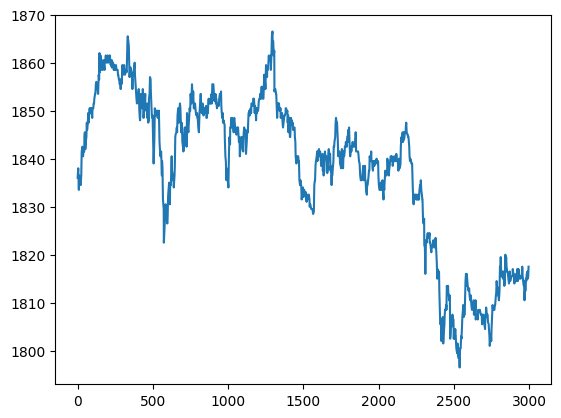

In [38]:
ink_prices = activities[activities["product"] == "SQUID_INK"]
plt.plot(ink_prices["mid_price"])

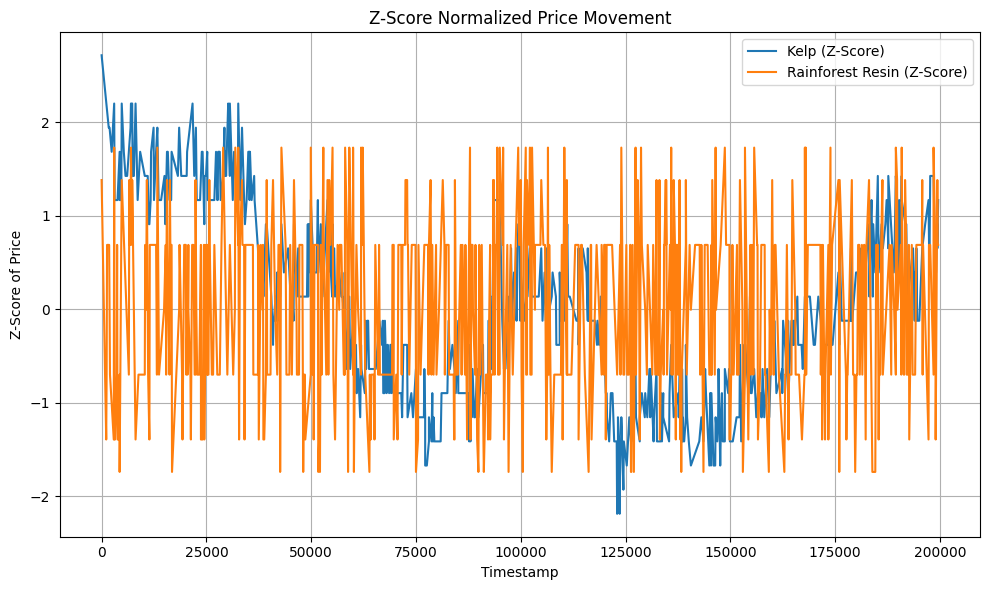

In [11]:
kelp_time = trade_history[trade_history["symbol"]=="KELP"]["timestamp"]
kelp_prices = trade_history[trade_history["symbol"]=="KELP"]["price"]
kelp_prices_pct_change = trade_history[trade_history["symbol"]=="KELP"]["price"].pct_change()
kelp_zscore = (kelp_prices - kelp_prices.mean()) / kelp_prices.std()

resin_time = trade_history[trade_history["symbol"]=="RAINFOREST_RESIN"]["timestamp"]
resin_prices = trade_history[trade_history["symbol"]=="RAINFOREST_RESIN"]["price"]
resin_prices_pct_change = trade_history[trade_history["symbol"]=="RAINFOREST_RESIN"]["price"].pct_change()
resin_zscore = (resin_prices - resin_prices.mean()) / resin_prices.std()



plt.figure(figsize=(10, 6))
plt.plot(kelp_time, kelp_zscore, label="Kelp (Z-Score)")
plt.plot(resin_time, resin_zscore, label="Rainforest Resin (Z-Score)")

plt.title("Z-Score Normalized Price Movement")
plt.xlabel("Timestamp")
plt.ylabel("Z-Score of Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.plot(resin_prices)

In [12]:
# pnl = pd.merge(trade_history, activities[["timestamp","profit_and_loss"]], how="left", on="timestamp")
trade_history["timestamp"] = trade_history["timestamp"].astype(str)
activities["timestamp"] = activities["timestamp"].astype(str)
# pnl = pd.merge(trade_history, activities[["timestamp", "profit_and_loss"]], how="left", on="timestamp")
pnl = pd.merge(trade_history, activities[["timestamp", "profit_and_loss"]], how="left", on="timestamp")

In [135]:
max(pnl[pnl["symbol"]=="RAINFOREST_RESIN"]["price"])

10005

In [136]:
pnl[pnl["symbol"]=="RAINFOREST_RESIN"].head(60)

,timestamp,buyer,seller,symbol,currency,price,quantity,profit_and_loss
4,0,,,RAINFOREST_RESIN,SEASHELLS,10004,1,0.0
5,0,,,RAINFOREST_RESIN,SEASHELLS,10004,1,0.0
6,1100,,,RAINFOREST_RESIN,SEASHELLS,9996,2,0.0
7,1100,,,RAINFOREST_RESIN,SEASHELLS,9996,2,0.0
8,1200,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9998,1,0.0
9,1200,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9998,1,0.0
10,1300,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10002,1,0.0
11,1300,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10002,1,2.0
14,1700,,,RAINFOREST_RESIN,SEASHELLS,10002,1,0.0
15,1700,,,RAINFOREST_RESIN,SEASHELLS,10002,1,4.0


In [99]:
trade_history.head(60)

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,,KELP,SEASHELLS,2029,13
1,0,,,KELP,SEASHELLS,2029,1
2,0,,,RAINFOREST_RESIN,SEASHELLS,10004,1
3,1100,,,RAINFOREST_RESIN,SEASHELLS,9996,2
4,1200,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9998,1
5,1300,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10002,1
6,1700,,,KELP,SEASHELLS,2026,8
7,1700,,,RAINFOREST_RESIN,SEASHELLS,10002,1
8,1800,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10002,1
9,1900,,,KELP,SEASHELLS,2026,1


In [137]:
activities = pd.DataFrame(activities_data)
# display(activities[activities["product"]=="RAINFOREST_RESIN"].head(60))
display(activities[activities["product"]=="KELP"].head(60))

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,0,KELP,2028,1,2026,2,2025,29,2029,31,,,,,2028.5,0.0
2,-1,100,KELP,2025,24,,,,,2028,2,2029,22,,,2026.5,0.0
5,-1,200,KELP,2025,22,,,,,2028,20,,,,,2026.5,0.0
6,-1,300,KELP,2025,31,,,,,2028,2,2029,29,,,2026.5,0.0
9,-1,400,KELP,2025,27,,,,,2028,27,,,,,2026.5,0.0
10,-1,500,KELP,2025,30,,,,,2028,30,,,,,2026.5,0.0
13,-1,600,KELP,2026,5,2025,31,,,2028,25,,,,,2027.0,0.0
14,-1,700,KELP,2025,2,2024,23,,,2028,23,,,,,2026.5,0.0
17,-1,800,KELP,2024,1,2023,29,,,2027,30,,,,,2025.5,0.0
18,-1,900,KELP,2024,23,,,,,2027,23,,,,,2025.5,0.0


In [145]:
activities.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss',
       'cum_profit_and_loss'],
      dtype='object')

<Axes: >

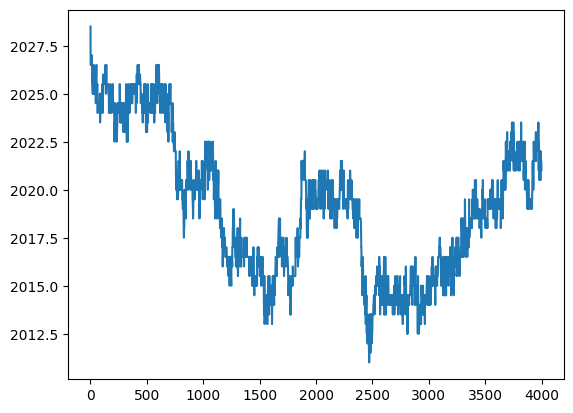

In [138]:
kelp_prices = activities[activities["product"]=="KELP"]["mid_price"]
kelp_prices.astype("float64").plot()

In [139]:
activities["profit_and_loss"] = pd.to_numeric(activities["profit_and_loss"])
activities["cum_profit_and_loss"] = activities["profit_and_loss"].cumsum()

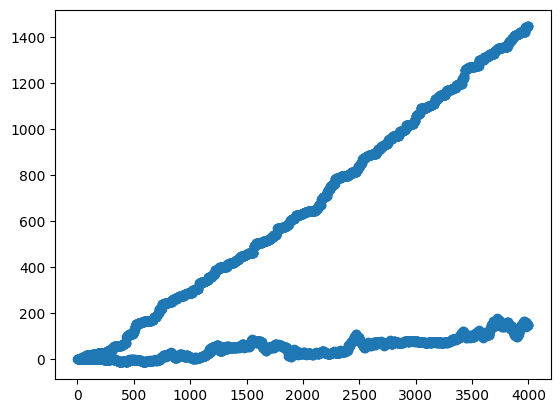

In [140]:
plt.scatter(activities.index, activities["profit_and_loss"])

In [144]:
149.65 + 1446

1595.65

In [143]:
activities.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,cum_profit_and_loss
3995,-1,199700,KELP,2020,27,,,,,2023,2,2024,25,,,2021.5,148.523438,1.445962e+06
3996,-1,199800,RAINFOREST_RESIN,9995,21,,,,,10002,8,10005,21,,,9998.5,1446.000000,1.447408e+06
3997,-1,199800,KELP,2020,21,,,,,2023,21,,,,,2021.5,147.449219,1.447555e+06
3998,-1,199900,KELP,2020,32,,,,,2022,7,2023,2,2024,30,2021.0,149.656250,1.447705e+06
3999,-1,199900,RAINFOREST_RESIN,9996,2,9995,30,,,10004,2,10005,30,,,10000.0,1446.000000,1.449151e+06


In [88]:
activities.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')

In [156]:
import pandas as pd
import numpy as np

def calculate_optimal_profit(activities):
    """
    Calculate the optimal trading strategy and profit from historical data.
    
    Parameters:
    activities (pandas.DataFrame): DataFrame with bid/ask prices and volumes
    
    Returns:
    tuple: (total_profit, trades_df) where trades_df contains all optimal trades
    """
    # Create a copy to avoid modifying original data
    df = activities.copy()
    
    # Prepare results dataframe to store all trades
    trades = []
    
    # Initialize variables to track positions for each product
    positions = {}
    total_profit = 0
    
    # Get unique products
    products = df['product'].unique()
    
    # Initialize positions for each product
    for product in products:
        positions[product] = 0
    
    # Group by timestamp to process each moment in time separately
    grouped = df.groupby('timestamp')
    
    # Sort timestamps to ensure chronological order
    timestamps = sorted(df['timestamp'].unique())
    
    for timestamp in timestamps:
        # Get data for current timestamp
        timestamp_data = grouped.get_group(timestamp)
        
        for _, row in timestamp_data.iterrows():
            product = row['product']
            current_position = positions[product]
            
            # Extract bid and ask prices/volumes
            bid_prices = [row[f'bid_price_{i}'] for i in range(1, 4)]
            bid_volumes = [row[f'bid_volume_{i}'] for i in range(1, 4)]
            ask_prices = [row[f'ask_price_{i}'] for i in range(1, 4)]
            ask_volumes = [row[f'ask_volume_{i}'] for i in range(1, 4)]
            
            # Sort bids in descending order (sell high)
            bids = sorted(zip(bid_prices, bid_volumes), key=lambda x: x[0], reverse=True)
            
            # Sort asks in ascending order (buy low)
            asks = sorted(zip(ask_prices, ask_volumes), key=lambda x: x[0])
            
            # Check if we should sell (if we have a position and there are good bids)
            if current_position > 0:
                # Try to sell at the highest possible prices
                for bid_price, bid_volume in bids:
                    if bid_price <= 0 or np.isnan(bid_price):
                        continue
                        
                    sell_volume = min(current_position, bid_volume)
                    if sell_volume > 0:
                        profit = sell_volume * bid_price
                        total_profit += profit
                        current_position -= sell_volume
                        
                        trades.append({
                            'timestamp': timestamp,
                            'product': product,
                            'action': 'sell',
                            'price': bid_price,
                            'volume': sell_volume,
                            'profit': profit,
                            'new_position': current_position
                        })
                        
                        if current_position == 0:
                            break
            
            # Check if we should buy (if we have room in our position and there are good asks)
            if current_position < 50:  # Position limit is 50
                # Try to buy at the lowest possible prices
                for ask_price, ask_volume in asks:
                    if ask_price <= 0 or np.isnan(ask_price):
                        continue
                        
                    room_left = 50 - current_position
                    buy_volume = min(room_left, ask_volume)
                    
                    if buy_volume > 0:
                        cost = buy_volume * ask_price
                        current_position += buy_volume
                        
                        trades.append({
                            'timestamp': timestamp,
                            'product': product,
                            'action': 'buy',
                            'price': ask_price,
                            'volume': buy_volume,
                            'cost': cost,
                            'new_position': current_position
                        })
                        
                        if current_position == 50:
                            break
            
            # Update the position for this product
            positions[product] = current_position
    
    # Calculate final profits by closing all positions using the last mid price
    last_rows = df.groupby('product').last()
    
    for product, position in positions.items():
        if position > 0:
            last_mid_price = last_rows.loc[product, 'mid_price']
            final_profit = position * last_mid_price
            total_profit += final_profit
            
            trades.append({
                'timestamp': timestamps[-1],
                'product': product,
                'action': 'liquidate',
                'price': last_mid_price,
                'volume': position,
                'profit': final_profit,
                'new_position': 0
            })
            
            positions[product] = 0
    
    # Create a DataFrame with all trades
    trades_df = pd.DataFrame(trades)
    
    return total_profit, trades_df

def analyze_results(trades_df):
    """
    Analyze the trading results.
    
    Parameters:
    trades_df (pandas.DataFrame): DataFrame with all trades
    
    Returns:
    dict: Analysis results
    """
    results = {}
    
    # Total profit
    profit_actions = trades_df[trades_df['action'].isin(['sell', 'liquidate'])]
    total_profit = profit_actions['profit'].sum() if 'profit' in profit_actions.columns else 0
    
    # Total cost
    cost_actions = trades_df[trades_df['action'] == 'buy']
    total_cost = cost_actions['cost'].sum() if 'cost' in cost_actions.columns else 0
    
    # Net profit
    net_profit = total_profit - total_cost
    
    # Profit by product
    profit_by_product = trades_df.groupby('product').apply(
        lambda x: x[x['action'].isin(['sell', 'liquidate'])]['profit'].sum() - 
                 x[x['action'] == 'buy']['cost'].sum()
    )
    
    # Number of trades
    num_trades = len(trades_df)
    
    # Number of trades by action
    trades_by_action = trades_df['action'].value_counts()
    
    results = {
        'net_profit': net_profit,
        'total_profit': total_profit,
        'total_cost': total_cost,
        'profit_by_product': profit_by_product,
        'num_trades': num_trades,
        'trades_by_action': trades_by_action
    }
    
    return results

# Example usage
total_profit, trades_df = calculate_optimal_profit(activities)
analysis = analyze_results(trades_df)
print(f"Total optimal profit: ${total_profit:.2f}")
print(analysis)

Total optimal profit: $636341636.00
{'net_profit': -685757.0, 'total_profit': 636341636.0, 'total_cost': 637027393.0, 'profit_by_product': product
KELP               -177510.0
RAINFOREST_RESIN   -508247.0
dtype: float64, 'num_trades': 12512, 'trades_by_action': action
buy          6286
sell         6224
liquidate       2
Name: count, dtype: int64}


/var/folders/cn/yvfyzgz910bghnld237rzj3h0000gn/T/ipykernel_55758/110201386.py:163: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profit_by_product = trades_df.groupby('product').apply(


# TO DO #
Get optimal profit if you were clairvoyant\
Figure out optimal moving average window

## Correlation Analysis ##

activities

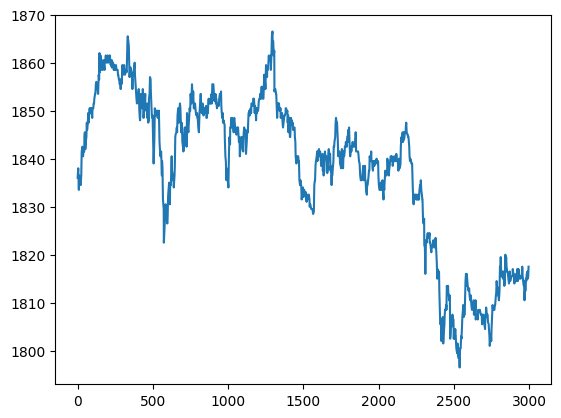

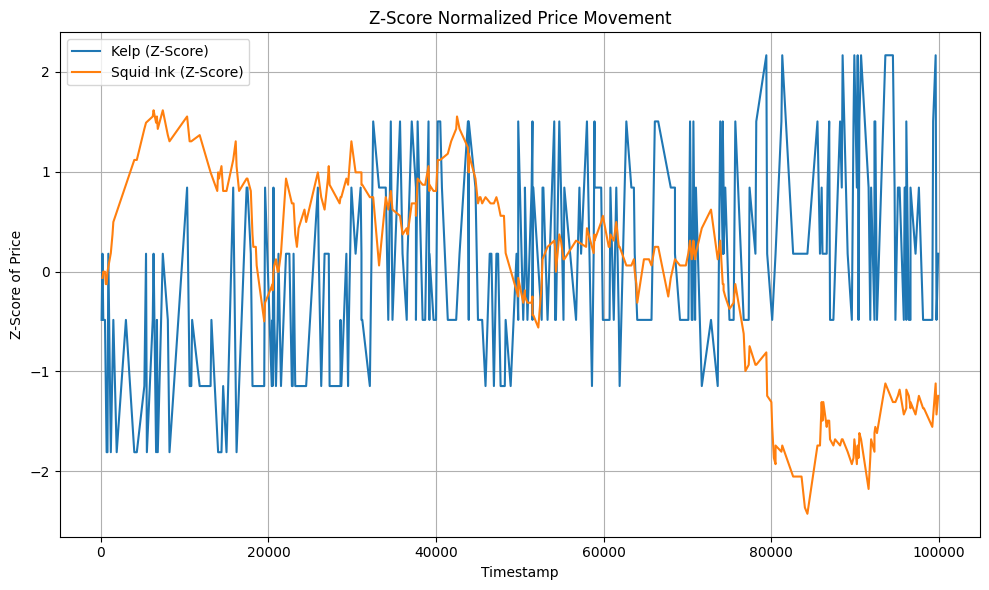

In [45]:
activities[activities["product"] == "SQUID_INK"]["mid_price"].plot()

kelp_time = trade_history[trade_history["symbol"]=="KELP"]["timestamp"]
kelp_prices = trade_history[trade_history["symbol"]=="KELP"]["price"]
kelp_prices_pct_change = trade_history[trade_history["symbol"]=="KELP"]["price"].pct_change()
kelp_zscore = (kelp_prices - kelp_prices.mean()) / kelp_prices.std()

resin_time = trade_history[trade_history["symbol"]=="SQUID_INK"]["timestamp"]
resin_prices = trade_history[trade_history["symbol"]=="SQUID_INK"]["price"]
resin_prices_pct_change = trade_history[trade_history["symbol"]=="SQUID_INK"]["price"].pct_change()
resin_zscore = (resin_prices - resin_prices.mean()) / resin_prices.std()



plt.figure(figsize=(10, 6))
plt.plot(kelp_time, kelp_zscore, label="Kelp (Z-Score)")
plt.plot(resin_time, resin_zscore, label="Squid Ink (Z-Score)")

plt.title("Z-Score Normalized Price Movement")
plt.xlabel("Timestamp")
plt.ylabel("Z-Score of Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Cointegration test p-value: 0.005281284898588986
The series are cointegrated.


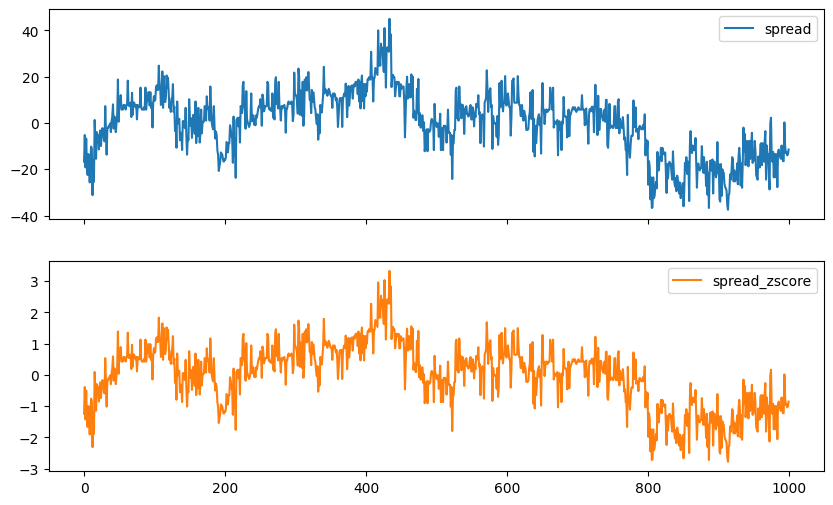

In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# Load your data (ensure your CSV has a datetime index and appropriate columns)
# df = pd.read_csv("prices.csv", index_col='timestamp', parse_dates=True)
kelp = list(activities[activities["product"] == "KELP"]["mid_price"])
squid = list(activities[activities["product"] == "SQUID_INK"]["mid_price"])

df = pd.DataFrame({"kelp":list(kelp), "squid":list(squid)})

# Perform cointegration test
score, pvalue, _ = coint(kelp, squid)
print("Cointegration test p-value:", pvalue)

if pvalue < 0.05:
    print("The series are cointegrated.")
    # Run a regression: SQUID_INK ~ KELP
    X = sm.add_constant(kelp)
    model = sm.OLS(squid, X).fit()
    df['spread'] = squid - model.predict(X)
    
    # Compute the Z-score of the spread
    spread_mean = df['spread'].mean()
    spread_std = df['spread'].std()
    df['spread_zscore'] = (df['spread'] - spread_mean) / spread_std

    # Plot the spread and its Z-score
    df[['spread', 'spread_zscore']].plot(subplots=True, figsize=(10, 6))
    plt.show()
    
    # Example trading signals:
    # If the Z-score is above 2, you might short SQUID_INK and go long KELP,
    # and if below -2, do the opposite.
else:
    print("The series are not cointegrated.")


In [57]:
import numpy as np

kelp = pd.Series(kelp)
squid = pd.Series(squid)

# Define a function to compute cross-correlation at various lags
def compute_cross_correlation(series_a, series_b, lag_range=(-10, 11)):
    results = {}
    for lag in range(lag_range[0], lag_range[1]):
        # Shift series_b by 'lag'
        corr = series_a.corr(series_b.shift(lag))
        results[lag] = corr
        print(f"Lag {lag}: Correlation = {corr:.3f}")
    return results

results = compute_cross_correlation(kelp, squid)

# Identify the lag with the highest correlation
best_lag = max(results, key=results.get)
print(f"Best lag: {best_lag} with correlation: {results[best_lag]:.3f}")


Lag -10: Correlation = -0.601
Lag -9: Correlation = -0.598
Lag -8: Correlation = -0.597
Lag -7: Correlation = -0.596
Lag -6: Correlation = -0.595
Lag -5: Correlation = -0.592
Lag -4: Correlation = -0.592
Lag -3: Correlation = -0.588
Lag -2: Correlation = -0.586
Lag -1: Correlation = -0.581
Lag 0: Correlation = -0.570
Lag 1: Correlation = -0.580
Lag 2: Correlation = -0.576
Lag 3: Correlation = -0.577
Lag 4: Correlation = -0.573
Lag 5: Correlation = -0.576
Lag 6: Correlation = -0.579
Lag 7: Correlation = -0.578
Lag 8: Correlation = -0.574
Lag 9: Correlation = -0.578
Lag 10: Correlation = -0.580
Best lag: 0 with correlation: -0.570


     KELP_zscore  KELP_signal
995     0.000000            0
996     0.044236            0
997     0.000000            0
998     0.022990            0
999     0.022990            0


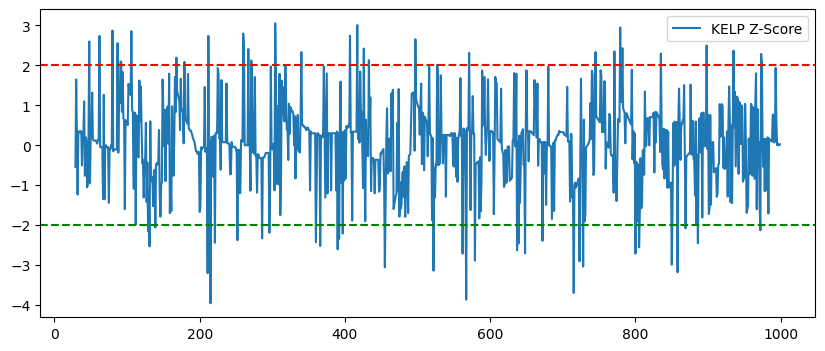

In [58]:
window = 30  # rolling window size
df['KELP_rolling_mean'] = kelp.rolling(window=window).mean()
df['KELP_rolling_std'] = kelp.rolling(window=window).std()
df['KELP_zscore'] = (kelp - df['KELP_rolling_mean']) / df['KELP_rolling_std']

# Generate signals:
# Buy when zscore < -2 (price significantly below the mean)
# Sell when zscore > 2 (price significantly above the mean)
df['KELP_signal'] = 0
df.loc[df['KELP_zscore'] < -2, 'KELP_signal'] = 1   # Buy signal
df.loc[df['KELP_zscore'] > 2, 'KELP_signal'] = -1   # Sell signal

print(df[['KELP_zscore', 'KELP_signal']].tail())

# Optionally, plot the Z-score and signals:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['KELP_zscore'], label='KELP Z-Score')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='green', linestyle='--')
plt.legend()
plt.show()


In [59]:
# Define moving average windows
short_window = 10
long_window = 50

df['KELP_short_ma'] = kelp.rolling(window=short_window).mean()
df['KELP_long_ma'] = kelp.rolling(window=long_window).mean()

# Assume the Z-score (from the previous example) is already computed in df['KELP_zscore']

# Generate a combined signal:
# Buy when short MA > long MA and Z-score is below an upper threshold (e.g., < 1)
# Sell when short MA < long MA and Z-score is above a lower threshold (e.g., > -1)
df['combined_signal'] = 0
df.loc[(df['KELP_short_ma'] > df['KELP_long_ma']) & (df['KELP_zscore'] < 1), 'combined_signal'] = 1
df.loc[(df['KELP_short_ma'] < df['KELP_long_ma']) & (df['KELP_zscore'] > -1), 'combined_signal'] = -1

print(df[['KELP_short_ma', 'KELP_long_ma', 'KELP_zscore', 'combined_signal']].tail())


     KELP_short_ma  KELP_long_ma  KELP_zscore  combined_signal
995        2036.30       2035.94     0.000000                1
996        2036.30       2035.93     0.044236                1
997        2036.30       2035.92     0.000000                1
998        2036.30       2035.93     0.022990                1
999        2036.25       2035.94     0.022990                1


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Compute returns and lagged features for KELP
df['KELP_return'] = kelp.pct_change()
df['KELP_return_lag1'] = df['KELP_return'].shift(1)
df['KELP_return_lag2'] = df['KELP_return'].shift(2)
df['KELP_zscore_lag1'] = df['KELP_zscore'].shift(1)

# Drop rows with missing values
df_ml = df.dropna()

# Define features and target variable
features = ['KELP_return_lag1', 'KELP_return_lag2', 'KELP_zscore_lag1']
target = 'KELP_return'
X = df_ml[features]
y = df_ml[target]

# Split the data (using time order; do not shuffle if time ordering matters)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Random Forest Mean Squared Error:", mse)

# Append predicted returns back to the dataframe for further analysis
df_ml['predicted_return'] = model.predict(X)
print(df_ml[['KELP_return', 'predicted_return']].tail())


Random Forest Mean Squared Error: 1.115452759330741e-07
     KELP_return  predicted_return
995    -0.000246          0.000133
996     0.000000          0.000134
997     0.000000         -0.000175
998     0.000000          0.000039
999     0.000000         -0.000172


/var/folders/cn/yvfyzgz910bghnld237rzj3h0000gn/T/ipykernel_66474/4159844269.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['predicted_return'] = model.predict(X)


In [61]:
# Calculate rolling volatility using percentage returns
vol_window = 30
df['KELP_return'] = kelp.pct_change()
df['KELP_volatility'] = df['KELP_return'].rolling(window=vol_window).std()

# Define a base position size (e.g., 50 units)
base_position = 50
# Adjust position inversely to volatility (be cautious: extreme values may need capping)
df['adjusted_position'] = base_position * (1 / df['KELP_volatility'])
df['adjusted_position'] = df['adjusted_position'].clip(lower=1, upper=base_position)

print(df[['KELP_volatility', 'adjusted_position']].tail())


     KELP_volatility  adjusted_position
995         0.000518               50.0
996         0.000516               50.0
997         0.000482               50.0
998         0.000463               50.0
999         0.000461               50.0


Analyzing second derivative (Comparison)

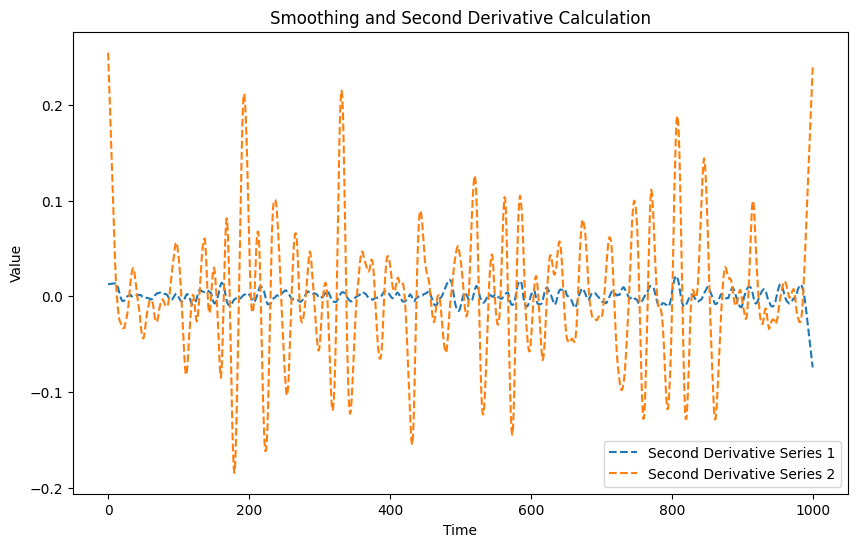

In [72]:
from scipy.signal import savgol_filter


def smooth_second(series1, series2):
    window_length = 21  # must be an odd number
    polyorder = 3

    # Smooth the series using the Savitzky–Golay filter
    smoothed1 = savgol_filter(series1, window_length=window_length, polyorder=polyorder)

    # Calculate the second derivative using the filter's derivative option
    second_deriv1 = savgol_filter(smoothed1, window_length=window_length, polyorder=polyorder, deriv=2)

    smoothed2 = savgol_filter(series2, window_length=window_length, polyorder=polyorder)

    # Calculate the second derivative using the filter's derivative option
    second_deriv2 = savgol_filter(smoothed2, window_length=window_length, polyorder=polyorder, deriv=2)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    # plt.plot(series.index, series, label='Original Data', alpha=0.5)
    # plt.plot(series.index, smoothed, label='Smoothed Data', linewidth=2)
    plt.plot(series1.index, second_deriv1, label='Second Derivative Series 1', linestyle='--')
    plt.plot(series2.index, second_deriv2, label='Second Derivative Series 2', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Smoothing and Second Derivative Calculation')
    plt.legend()
    plt.show()

smooth_second(kelp, squid)

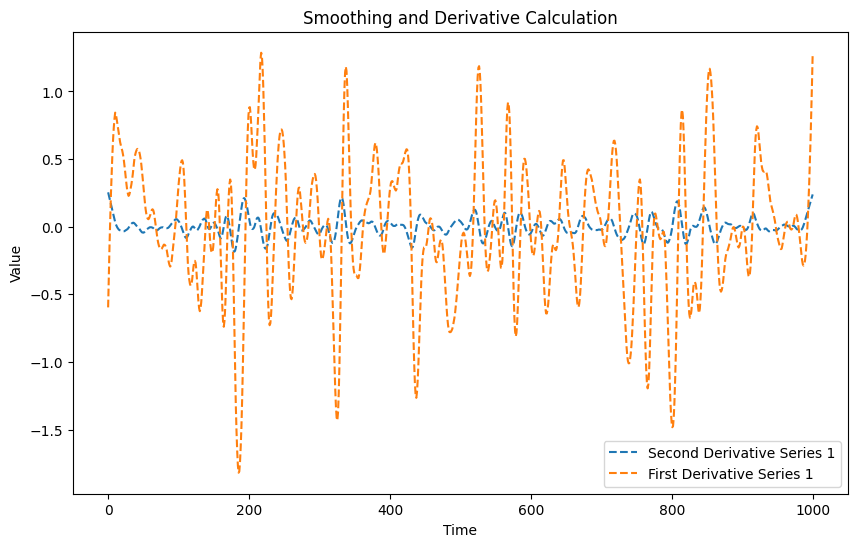

In [76]:
from scipy.signal import savgol_filter


def smooth_comparison(series1):
    window_length = 21  # must be an odd number
    polyorder = 3

    # Smooth the series using the Savitzky–Golay filter
    smoothed1 = savgol_filter(series1, window_length=window_length, polyorder=polyorder)

    # Calculate the second derivative using the filter's derivative option
    second_deriv1 = savgol_filter(smoothed1, window_length=window_length, polyorder=polyorder, deriv=2)

    smoothed2 = savgol_filter(series1, window_length=window_length, polyorder=polyorder)

    # Calculate the second derivative using the filter's derivative option
    first_deriv = savgol_filter(smoothed2, window_length=window_length, polyorder=polyorder, deriv=1)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    # plt.plot(series.index, series, label='Original Data', alpha=0.5)
    # plt.plot(series.index, smoothed, label='Smoothed Data', linewidth=2)
    plt.plot(series1.index, second_deriv1, label='Second Derivative Series 1', linestyle='--')
    plt.plot(series1.index, first_deriv, label='First Derivative Series 1', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Smoothing and Derivative Calculation')
    plt.legend()
    plt.show()

smooth_comparison(squid)

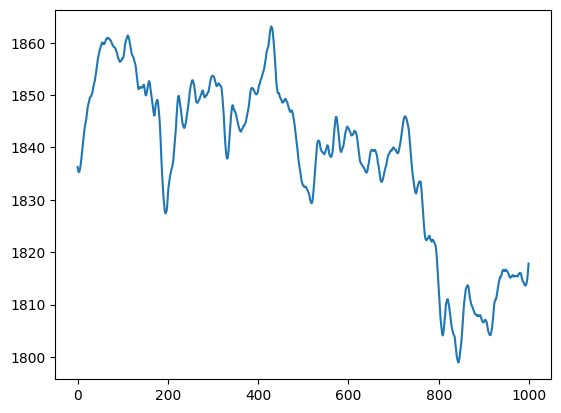

In [83]:
plt.plot(savgol_filter(squid, window_length=21, polyorder=3))
# plt.plot(savgol_filter(squid, window_length=21, polyorder=3, deriv=1))

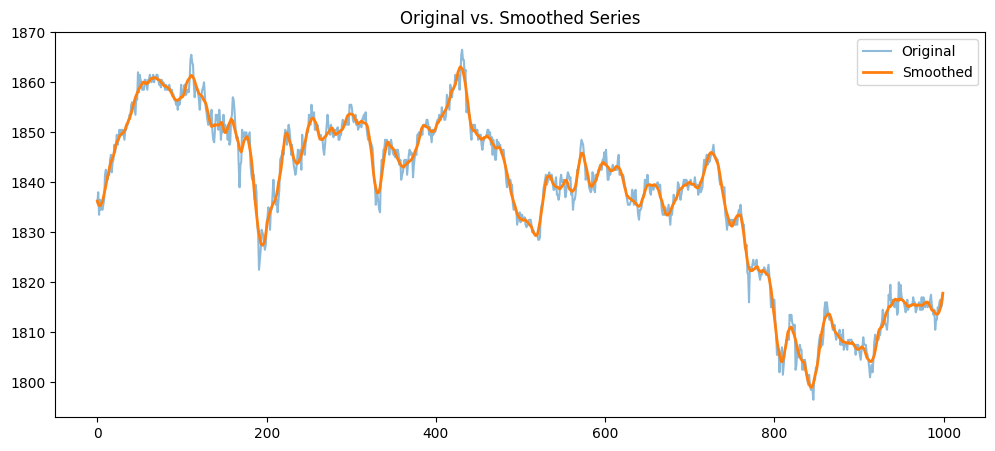

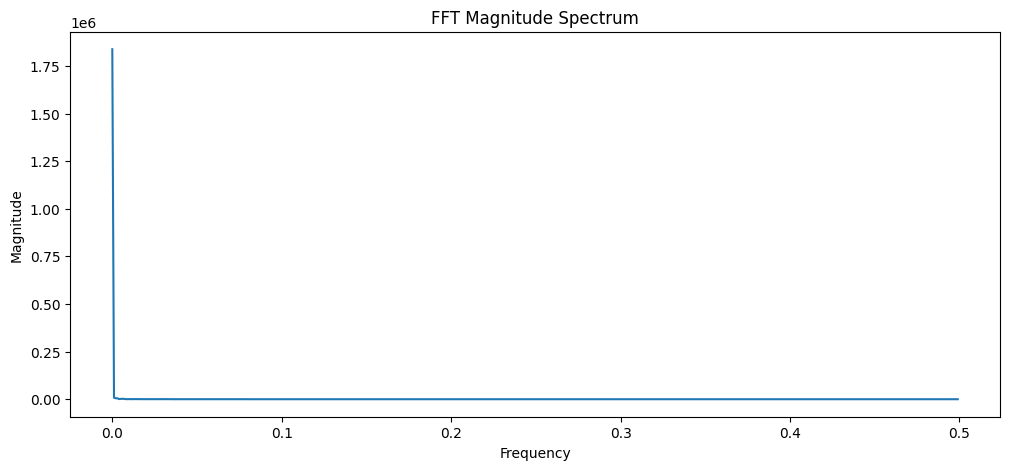

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def smooth_and_fourier_analysis(series, method='savgol', window_size=21, poly_order=3, sampling_interval=1, plot=True):
    """
    Smooths a pandas Series and performs Fourier analysis on it.
    
    Parameters:
    - series : pandas.Series
        The input time series data.
    - method : str, optional
        The smoothing method to use ('savgol' or 'rolling'). Default is 'savgol'.
    - window_size : int, optional
        The window size for smoothing. For savgol_filter, window_size must be odd and >= poly_order+2.
    - poly_order : int, optional
        The polynomial order for the Savitzky-Golay filter (only used if method='savgol').
    - sampling_interval : float, optional
        The time interval between samples (used in FFT frequency calculation). Default is 1.
    - plot : bool, optional
        If True, the function will plot the smoothed time series and FFT magnitude spectrum.
    
    Returns:
    - smoothed_series : pandas.Series
        The smoothed time series.
    - positive_freqs : numpy.ndarray
        The positive frequency components from the FFT.
    - magnitude : numpy.ndarray
        The corresponding magnitude of the FFT for the positive frequencies.
    """
    
    # Apply smoothing based on the chosen method
    if method.lower() == 'rolling':
        # Use a rolling mean to smooth the data
        smoothed_series = series.rolling(window=window_size, center=True).mean()
        smoothed_data = smoothed_series.values
    elif method.lower() == 'savgol':
        # Use Savitzky-Golay filter to smooth the data
        smoothed_data = savgol_filter(series, window_length=window_size, polyorder=poly_order)
        smoothed_series = pd.Series(smoothed_data, index=series.index)
    else:
        raise ValueError("Invalid smoothing method. Choose 'rolling' or 'savgol'.")
    
    # Perform FFT on the smoothed data
    N = len(smoothed_data)
    Y = np.fft.fft(smoothed_data)
    freqs = np.fft.fftfreq(N, d=sampling_interval)
    
    # Select only the positive frequencies (FFT is symmetric for real signals)
    positive_freqs = freqs[:N // 2]
    magnitude = np.abs(Y)[:N // 2]
    
    # Optionally plot the results
    if plot:
        # Plot the original and smoothed series
        plt.figure(figsize=(12, 5))
        plt.plot(series, label='Original', alpha=0.5)
        plt.plot(series.index, smoothed_data, label='Smoothed', linewidth=2)
        plt.title('Original vs. Smoothed Series')
        plt.legend()
        plt.show()
        
        # Plot the FFT magnitude spectrum
        plt.figure(figsize=(12, 5))
        plt.plot(positive_freqs, magnitude)
        plt.title('FFT Magnitude Spectrum')
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude')
        plt.show()
    
    return smoothed_series, positive_freqs, magnitude

# Example usage:
smoothed, freqs, mag = smooth_and_fourier_analysis(squid, method='savgol', window_size=21, poly_order=3)


In [96]:
backtest = pd.read_csv(f"{path}/backtesting/Backtest_Grid_Search_Results.csv")
np.argmax(backtest["Total_PnL"])
backtest.head(10)

,alpha_resin,alpha_short,alpha_long,crossover_threshold,spread_margin,RAINFOREST_RESIN_PnL,KELP_PnL,Total_PnL
0,0.05,0.2,0.05,0.0,0.0,-49648.0,-2033.0,-51681.0
1,0.05,0.2,0.05,0.0,0.5,30350.0,-2033.0,28317.0
2,0.05,0.2,0.05,0.0,1.0,40350.0,-2033.0,38317.0
3,0.05,0.2,0.05,0.5,0.0,-49648.0,0.0,-49648.0
4,0.05,0.2,0.05,0.5,0.5,30350.0,0.0,30350.0
5,0.05,0.2,0.05,0.5,1.0,40350.0,0.0,40350.0
6,0.05,0.2,0.05,1.0,0.0,-49648.0,0.0,-49648.0
7,0.05,0.2,0.05,1.0,0.5,30350.0,0.0,30350.0
8,0.05,0.2,0.05,1.0,1.0,40350.0,0.0,40350.0
9,0.05,0.2,0.10,0.0,0.0,-49648.0,-2036.0,-51684.0
